# Using the vna

In [3]:
#from E5072A import *
from pylayers.antprop.channel import *
from pylayers.measures.vna.E5072A import *
import seaborn as sns
import numpy as np
%matplotlib inline

Attention à la taile du buffer lu. Toutes les données ne sont pas utiles.

In [2]:
vna = SCPI("129.20.33.201",verbose=False)
ident = vna.getIdent()
lNpoints = [201,401,801,1001,1201,1401,1601]
#lNpoints = [1601]
print "Talking to : ",ident
vna.write("FORM:DATA REAL")
#vna.write("SENS:AVER:ON")
vna.select(param='S21',chan=1)
vna.setf(startGHz=1.8,stopGHz=2.2)
lav = [1,999] #average
lsif = ['1000','300000','500000'] #IF band
lS = []
lt = []
#Npoints = 201
#for Npoints in lNpoints:
for sif in lsif:
    #for av in lav:
        #print Npoints
        #print av
    vna.setnpoint(Npoints=Npoints)
    vna.write(":SENS1:BAND "+sif)
    #vna.write(":SENS1:SWE:POIN 1201")
    #vna.write("DISP:WIND1:TRAC1:Y:SCAL:AUTO")
    #vna.s.send(":SENS1:SWE:POIN?\n")
    #Npoints = eval(vna.s.recv(56).replace('\n',''))
    print "Npoints : ",Npoints
    # set fmin fmax
    #vna.write(":SENS1:FREQ:STAR 1.8e9")
    #vna.write(":SENS1:FREQ:STOP 2.2e9")
    #vna.write("TRIG:SING")
    #vna.write("SENS:AVER:"+str(av))
    #vna.write("SENS:AVER:CLE")
    #time.sleep(6)
    com1 = ":CALC1:DATA:SDAT?\n"
    #u = np.arange(0,Npoints)*2
    #v = np.arange(0,Npoints)*2+1
    N = 1000
    fGHz = np.linspace(1.8,2.2,Npoints)
    tic = time.time()
    for k in range(N):
        S = vna.getdata(Npoints=Npoints)
        lt.append(time.time())
        try:
            S21.append(S)
        except:
            S21=S
        toc = time.time()
        #print toc-tic
        lt.append(toc-tic)
        lS.append(S21)
        del S21
        #get frequency range
        #com = ":SENS1:FREQ:DATA?\n"
        #tab = vna.read(com)
        #f = np.frombuffer(tab,'>f8')
        #freq = f[1:]

vna.close()

Talking to :  Agilent Technologies,E5072A,MY51100293,A.01.04

Npoints :  201
Npoints :  201
Npoints :  201


In [4]:
print toc-tic

313.160336018


In [5]:
#v0=np.var(lS[0].y,axis=0)
#v1=np.var(lS[1].y,axis=0)
v0=np.abs(lS[0].y) #cal with IF = 1KHz
v1=np.abs(lS[1].y) #cal with IF = 300KHz
v2=np.abs(lS[2].y)

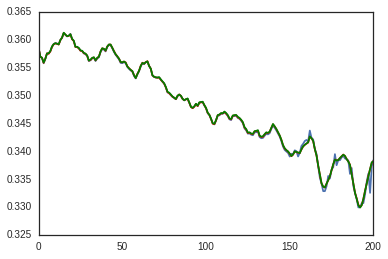

In [6]:
#sns.tsplot(np.abs(v0),color='b',label="IF 1KHz")
#sns.tsplot(np.abs(v1),color='r',label="IF 300KHz")
#legend(loc=1)
sns.tsplot(np.abs(v0))
sns.tsplot(np.abs(v1),color='r')
sns.tsplot(np.abs(v2),color='g')

In [9]:
data0=np.abs(v0)
data1=np.abs(v1)

ValueError: arrays must all be same length

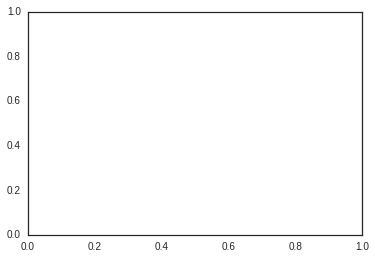

In [10]:
sns.tsplot(time="Npoints", value="Amplitude", data=data0)
sns.tsplot(time="Npoints", value="Ampitude", data=data1)

In [2]:
vna = SCPI("129.20.33.201",verbose=False)

In [3]:
vna.write(":SENS1:SWE:POIN 201")
vna.write(":SENS1:BAND 10")

In [7]:
vna = SCPI("129.20.33.201",verbose=False)
ident = vna.getIdent()
print "Talking to : ",ident
vna.write("FORM:DATA REAL")
vna.select(param='S21',chan=1)
vna.write(":SENS1:SWE:POIN 1201")
vna.write("DISP:WIND1:TRAC1:Y:SCAL:AUTO")
vna.s.send(":SENS1:SWE:POIN?\n")
Npoints = eval(vna.s.recv(56).replace('\n',''))
print "Npoints : ",Npoints
# set fmin fmax
vna.write(":SENS1:FREQ:STAR 1.8e9")
vna.write(":SENS1:FREQ:STOP 2.2e9")

#get frequency range
com = ":SENS1:FREQ:DATA?\n"

vna.write("TRIG:SING")

time.sleep(1)
com1 = ":CALC1:DATA:SDAT?\n"
#u = np.arange(0,Npoints)*2
#v = np.arange(0,Npoints)*2+1
N = 1
fGHz = np.linspace(1.8,2.2,1201)
y  = np.zeros(len(fGHz))[None,:]
H = Tchannel(x=fGHz,y=y)
for k in range(N):
#plt.imshow(abs(res))
    B = vna.read(com1)
    C = B[8:]
    print len(C)
    print Npoints*16
    assert(len(C)==Npoints*16)
    S = np.frombuffer(C,dtype='>f8')
    H.frombuf(S)
    #S21 = S[u]+1j*S[v]
    #try:
    #    res=np.vstack((res,S21.T))
    #except:
    #    res=S21.T
#
#
#    tab = vna.readeval(vna)(com)
#    f = np.frombuffer(tab,'>f8')
#    freq = f[1:]
#    plt.plot(freq)
vna.close()
#plt.imshow(abs(res))
#plt.axis('tight')
#plt.show()

Talking to :  Agilent Technologies,E5072A,MY51100293,A.01.04

Npoints :  1201
19216
19216


In [8]:
H.save('calibration')

In [9]:
H.calibrate('calibration')

In [10]:
S

array([ 0.14062586,  0.33333304,  0.36024529, ...,  0.        ,
        0.        ,  0.        ])

(-1, 2)

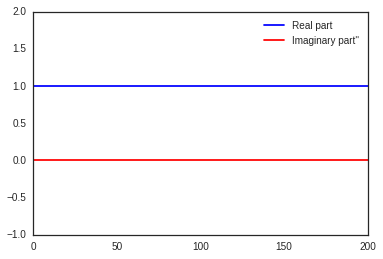

In [11]:
plt.plot(np.real(H.y[0]),'b',label="Real part")
plt.plot(np.imag(H.y[0]),'r',label='Imaginary part"')
plt.legend()
plt.ylim(-1,2)

In [12]:
H.plot()

UnboundLocalError: local variable 'ax' referenced before assignment

In [13]:
H

freq : 1.8 2.2 1201
shape  : (1, 1201)
tau (min, max) : [] []
dist :[] []

 calibrated : Yes
 windowed : No

In [14]:
fig=figure(figsize=(20,10))
H.plot(fig=fig)

NameError: name 'figure' is not defined

In [ ]:
800*0.1

80.0

In [15]:
h=H.ift(ffts=1)

In [16]:
h.plot(typ='v',xmin=-10,xmax=10)

UnboundLocalError: local variable 'ax' referenced before assignment

In [17]:
H=Tchannel()

In [18]:
H.load('calibration.mat')

In [19]:
H

freq : 1.8 2.2 1201
shape  : (1, 1201)
tau (min, max) : [] []
dist :[] []

 calibrated : No
 windowed : No

In [20]:
H.plot()

UnboundLocalError: local variable 'ax' referenced before assignment

In [ ]:
H.calibrate('calibration.mat')

In [ ]:
H.plot()

(<matplotlib.figure.Figure at 0x7f927165f610>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9271655710>]], dtype=object))

In [ ]:
h=H.ift(ffts=1)

In [ ]:
h.plot(typ='v')

(<matplotlib.figure.Figure at 0x7f927159be10>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9271642910>]], dtype=object))